<a href="https://colab.research.google.com/github/RoyMassett/Roy_Ava_Clustering_2019/blob/master/notebooks/Thickness_Interaction_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pip
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [0]:
def pca_2D_raw(data):
    #features being analyzed
  features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
              'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
  #defining x and y
  x = data.loc[:, features].values   #features
  y = data.loc[:,'Diagnosis'].values      #Diagnosis = dx1; target
  #Standarizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components=2)
  #pca.components_ 
  principalComponents = pca.fit_transform(x)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

  return principalDf 

In [0]:
def pca_2D_clustered(data):
    #features being analyzed
  features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
              'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
  #defining x and y
  x = data.loc[:, features].values   #features
  y = data.loc[:,'Cluster'].values      #Diagnosis = dx1; target
  #Standarizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components=2)
  #pca.components_ 
  principalComponents = pca.fit_transform(x)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

  return principalDf 

In [10]:
url = 'https://raw.githubusercontent.com/RoyMassett/Roy_Ava_Clustering_2019/master/thick_long_lvPPA_Interaction.csv'
interaction = pd.read_csv(url)
interaction

,PIDN,Unnamed: 1,Diagnosis,time_dff_year,AgeAtDC,Sex,ScannerID,Hand,Educ,Unnamed: 9,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,762,1,1,1.704,60,0,1,0,18.0,NaN,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,NaN,NaN,NaN,NaN
1,762,0,1,NaN,62,0,1,0,18.0,NaN,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,NaN,NaN,NaN,NaN
2,767,1,1,1.529,73,0,3,0,20.0,NaN,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,NaN,NaN,NaN,NaN
3,767,0,1,NaN,75,0,3,0,20.0,NaN,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,NaN,NaN,NaN,NaN
4,1416,1,1,1.381,61,1,1,0,16.0,NaN,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,NaN,NaN,NaN,NaN
5,1416,0,1,NaN,62,1,1,0,16.0,NaN,2.577162,2.718480,2.646610,2.968273,2.073682,2.736067,2.807300,2.562202,2.775829,2.561281,2.686602,2.628460,2.360203,2.629137,2.494548,2.782048,2.765336,2.663937,NaN,NaN,NaN,NaN
6,2046,1,1,1.156,61,0,1,0,18.0,NaN,2.704527,2.749341,2.487800,2.957110,2.403195,2.779081,2.517234,2.666177,2.664261,2.531226,2.842952,2.643935,2.597834,3.120962,2.710930,3.147936,3.169215,2.533692,NaN,NaN,NaN,NaN
7,2046,0,1,NaN,63,0,1,0,18.0,NaN,2.696808,2.767622,2.481920,2.954218,2.356598,2.725853,2.525122,2.594431,2.671367,2.505001,2.904369,2.657929,2.591983,3.128770,2.761865,3.054489,3.081047,2.465373,NaN,NaN,NaN,NaN
8,2292,1,1,1.203,53,0,3,0,14.0,NaN,2.891499,2.792549,2.675938,2.992440,2.494732,3.027494,2.630120,2.858666,2.926719,2.638430,2.896413,2.763047,2.578166,2.803638,2.880540,3.188384,3.083693,2.416793,NaN,NaN,NaN,NaN
9,2292,0,1,NaN,55,0,3,0,14.0,NaN,2.893758,2.772458,2.685185,2.985241,2.469858,3.047856,2.574103,2.880883,2.899975,2.657125,2.819985,2.805660,2.610534,2.767633,2.903956,3.202553,3.179590,2.417549,NaN,NaN,NaN,NaN


In [11]:
#features being analyzed
features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
            'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
#defining x and y
x = interaction.loc[:, features].values   #features
y = interaction.loc[:,'Diagnosis'].values      #Diagnosis = dx1; target
#Standarizing the features
x = StandardScaler().fit_transform(x)

x

array([[-0.46791767, -1.00634845, -0.50955624, ...,  0.38848971,
         0.68546109,  0.21367724],
       [ 0.02779573, -0.83317014, -0.25338651, ..., -0.03616645,
         0.61354467,  0.08391093],
       [-0.01611324,  0.17758364,  0.14108071, ...,  0.74645612,
         0.56423086,  0.77855667],
       ...,
       [-1.25853261, -0.56487983, -2.14371648, ...,  0.20655185,
         0.40670507,  0.00764031],
       [-1.37838924, -1.75615042, -2.10096343, ..., -3.15782467,
        -2.55814604, -0.95179719],
       [-1.9730838 , -1.916419  , -2.20293404, ..., -3.52546976,
        -2.6832666 , -1.09192958]])

In [12]:
interaction_initial = interaction.iloc[::2]
interaction_initial = interaction_initial.set_index(pd.Index(range(84)))
interaction_final = interaction.iloc[1::2]
interaction_final = interaction_final.set_index(pd.Index(range(84)))
interaction_features_with_diagnosis_and_PIDN = interaction.drop(['Unnamed: 1', 'time_dff_year', 'AgeAtDC', 'Sex', 'ScannerID', 'Hand', 'Educ', 'Unnamed: 9', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'], axis= 1)
interaction_features_with_diagnosis = interaction_features_with_diagnosis_and_PIDN.drop("PIDN", axis=1)
interaction_features_with_PIDN = interaction_features_with_diagnosis_and_PIDN.drop("Diagnosis", axis=1)
interaction_features = interaction_features_with_diagnosis.drop('Diagnosis', axis= 1)
interaction.head()

,PIDN,Unnamed: 1,Diagnosis,time_dff_year,AgeAtDC,Sex,ScannerID,Hand,Educ,Unnamed: 9,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,762,1,1,1.704,60,0,1,0,18.0,NaN,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,NaN,NaN,NaN,NaN
1,762,0,1,NaN,62,0,1,0,18.0,NaN,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,NaN,NaN,NaN,NaN
2,767,1,1,1.529,73,0,3,0,20.0,NaN,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,NaN,NaN,NaN,NaN
3,767,0,1,NaN,75,0,3,0,20.0,NaN,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,NaN,NaN,NaN,NaN
4,1416,1,1,1.381,61,1,1,0,16.0,NaN,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,NaN,NaN,NaN,NaN


In [13]:
#Computing changes
changes = interaction_features_with_PIDN.groupby("PIDN").diff()
changes = changes.iloc[1::2]
changes = -changes
changes_with_diagnosis = changes.copy()
changes = changes.set_index(pd.Index(range(84)))
changes_with_diagnosis["Diagnosis"] = interaction[1::2]["Diagnosis"]
changes_with_diagnosis = changes_with_diagnosis.set_index(pd.Index(range(84)))
changes_with_diagnosis.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Diagnosis
0,-0.098812,-0.036080,-0.049995,-0.079824,0.228147,-0.080182,-0.016810,-0.057971,-0.167500,-0.066036,-0.104328,0.028716,0.016738,-0.123051,0.081660,0.155587,0.024117,0.030079,1
1,0.014298,-0.013110,0.031313,0.038937,-0.013244,-0.036922,-0.012241,-0.038823,-0.005544,0.060630,0.018661,0.021142,-0.038798,0.047263,0.057534,0.060220,0.033155,0.030628,1
2,0.036438,-0.097279,0.034129,-0.007884,0.040193,-0.011251,0.142972,0.048388,0.068715,0.017417,0.073304,-0.009413,-0.051758,-0.062821,0.084486,0.022499,0.319092,-0.075363,1
3,0.007720,-0.018281,0.005880,0.002892,0.046597,0.053228,-0.007888,0.071746,-0.007106,0.026225,-0.061417,-0.013994,0.005852,-0.007808,-0.050935,0.093447,0.088168,0.068318,1
4,-0.002259,0.020091,-0.009247,0.007200,0.024874,-0.020362,0.056017,-0.022218,0.026744,-0.018695,0.076428,-0.042614,-0.032368,0.036005,-0.023416,-0.014169,-0.095897,-0.000756,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97afa16978>,
      dtype=object)

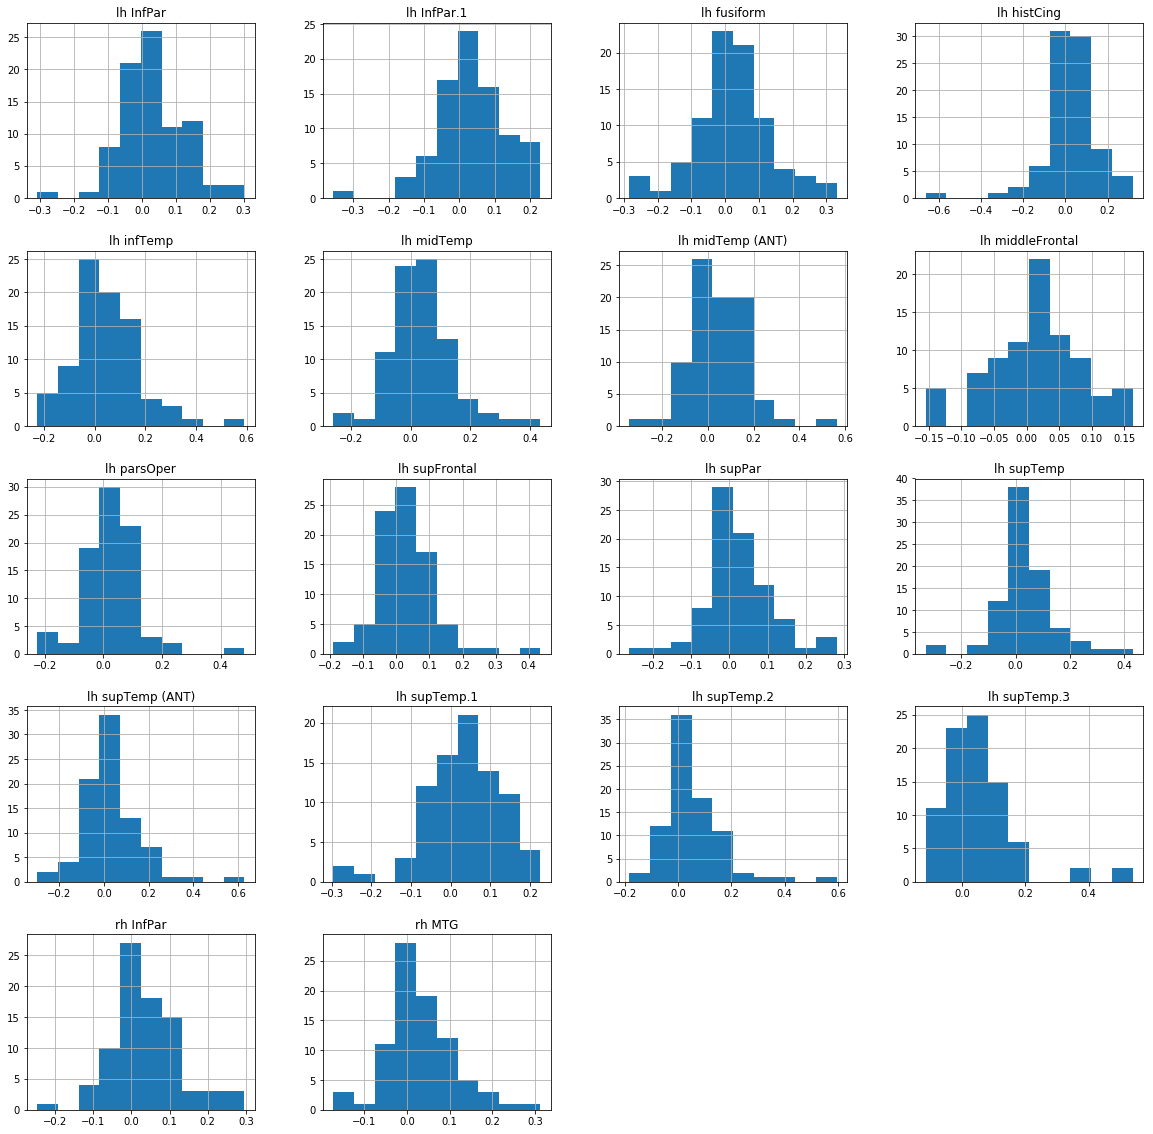

In [14]:
#Histograms of changes
changes.hist(figsize = [20, 20])

In [15]:
#Convert to long form for violin plot
long_form = pd.melt(changes_with_diagnosis, id_vars="Diagnosis", value_vars=features)
long_form.head()

,Diagnosis,variable,value
0,1,rh InfPar,-0.098812
1,1,rh InfPar,0.014298
2,1,rh InfPar,0.036438
3,1,rh InfPar,0.007720
4,1,rh InfPar,-0.002259


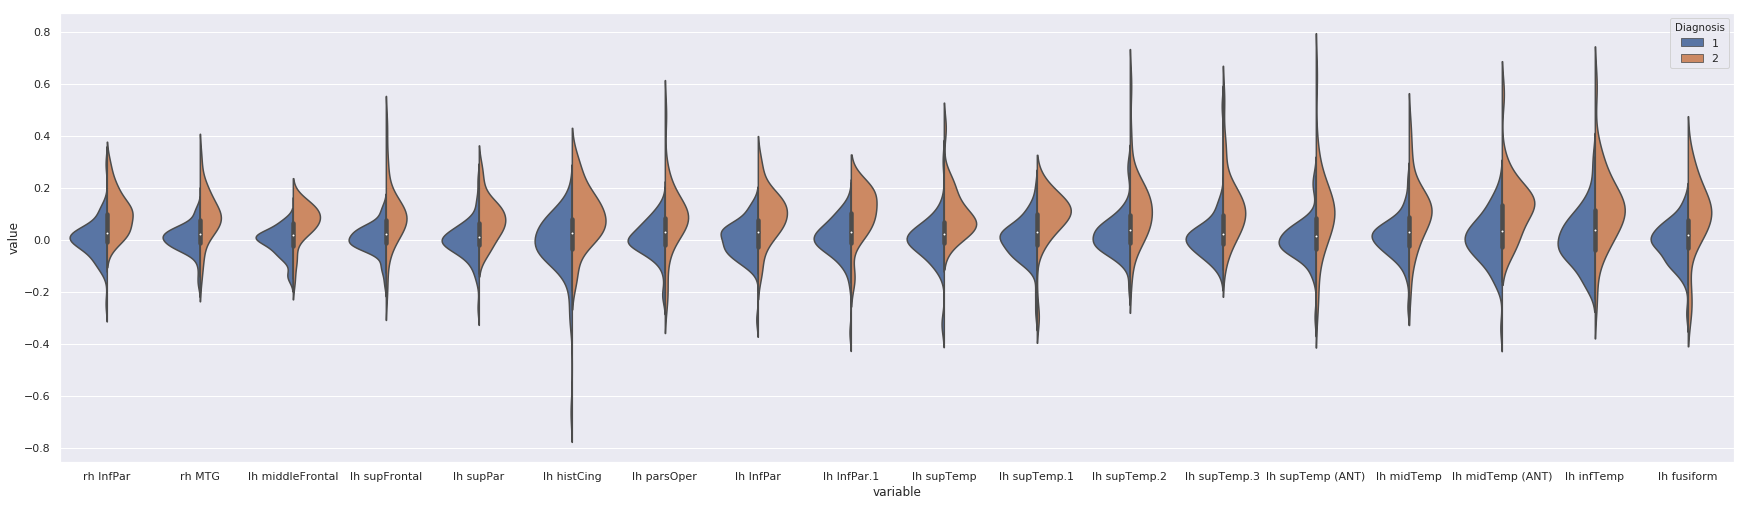

In [16]:
#Violin plot of changes
sns.set(rc={'figure.figsize':(30,8.27)})
ax_violin = sns.violinplot(x='variable', y='value', data=long_form, hue="Diagnosis", split=True)

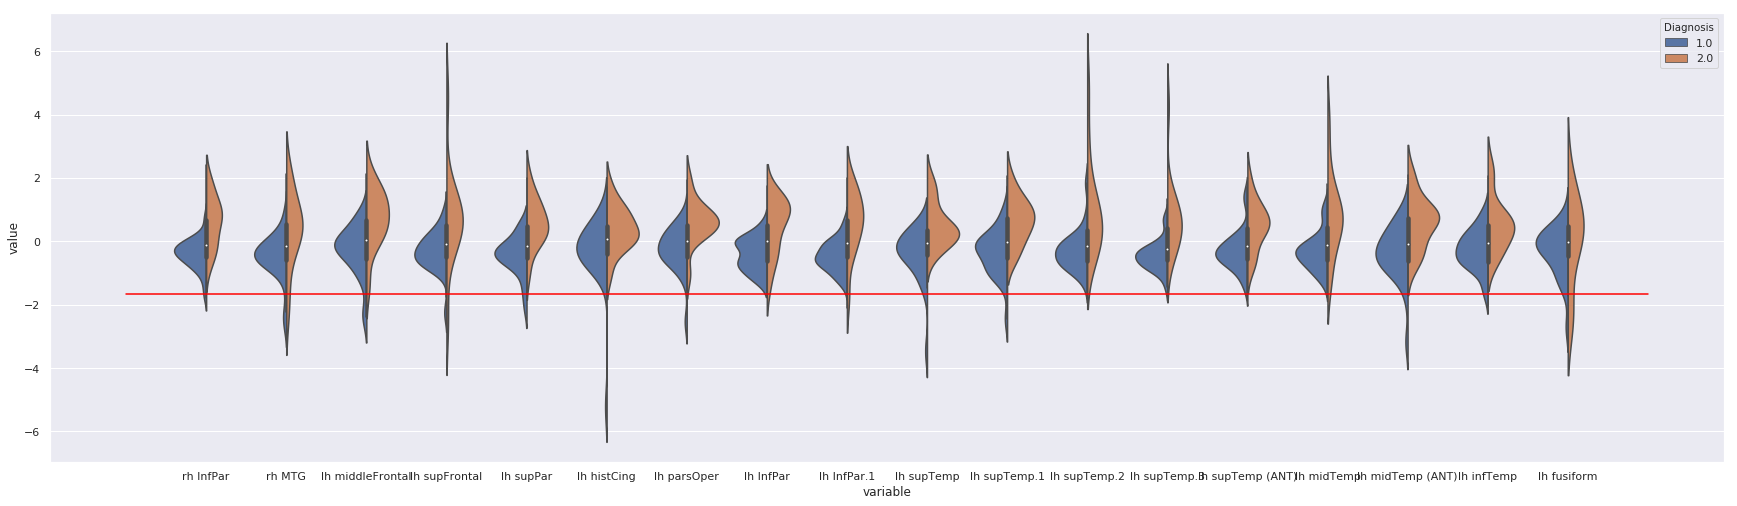

In [17]:
#Violin plot of standardized changes
standardized_changes = StandardScaler().fit_transform(changes)
standardized_changes
interaction_changes_standardized = pd.DataFrame({features[i]: [standardized_changes[j][i] for j in range(len(standardized_changes))] for i in range(len(features))})
interaction_changes_standardized
interaction_changes_standardized["Diagnosis"] = changes_with_diagnosis[1::2]["Diagnosis"]
long_form_standardized = pd.melt(interaction_changes_standardized, id_vars="Diagnosis", value_vars=features)
sns.set(rc={'figure.figsize':(30,8.27)})
ax_violin = sns.violinplot(x='variable', y='value', data=long_form_standardized, hue="Diagnosis", split=True)
plt.plot(range(-1, 19), 20 * [-1.65], color="red")

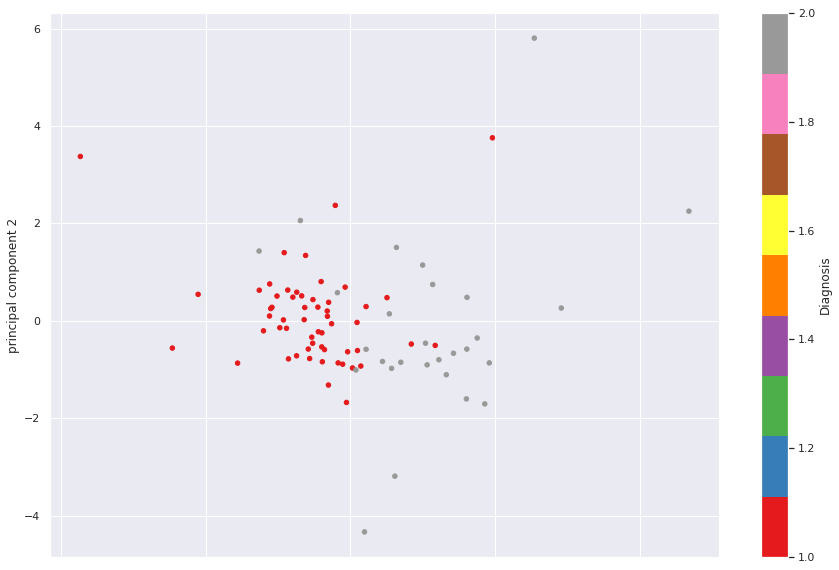

In [18]:
#PCA of changes
sns.set(rc={'figure.figsize':(15, 10)})
changes_pca = pca_2D_raw(changes_with_diagnosis)
changes_pca["Diagnosis"] = changes_with_diagnosis["Diagnosis"]
ax_unclustered = changes_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Diagnosis", colormap="Set1")

In [19]:
#Two cluster PCA of changes
changes_2_clusters = changes.copy()
km_2 = KMeans(n_clusters = 2)
changes_two_clusters = km_2.fit(changes_2_clusters)
two_labels = changes_two_clusters.labels_
changes_2_clusters['Cluster'] = two_labels
changes_2_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,-0.098812,-0.036080,-0.049995,-0.079824,0.228147,-0.080182,-0.016810,-0.057971,-0.167500,-0.066036,-0.104328,0.028716,0.016738,-0.123051,0.081660,0.155587,0.024117,0.030079,1
1,0.014298,-0.013110,0.031313,0.038937,-0.013244,-0.036922,-0.012241,-0.038823,-0.005544,0.060630,0.018661,0.021142,-0.038798,0.047263,0.057534,0.060220,0.033155,0.030628,1
2,0.036438,-0.097279,0.034129,-0.007884,0.040193,-0.011251,0.142972,0.048388,0.068715,0.017417,0.073304,-0.009413,-0.051758,-0.062821,0.084486,0.022499,0.319092,-0.075363,1
3,0.007720,-0.018281,0.005880,0.002892,0.046597,0.053228,-0.007888,0.071746,-0.007106,0.026225,-0.061417,-0.013994,0.005852,-0.007808,-0.050935,0.093447,0.088168,0.068318,1
4,-0.002259,0.020091,-0.009247,0.007200,0.024874,-0.020362,0.056017,-0.022218,0.026744,-0.018695,0.076428,-0.042614,-0.032368,0.036005,-0.023416,-0.014169,-0.095897,-0.000756,1


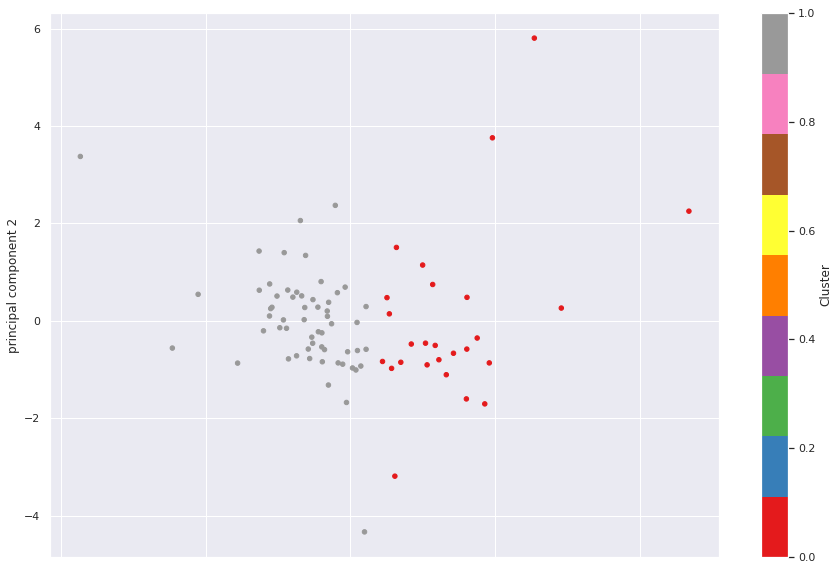

In [20]:
#PCA plot of two clusters
changes_two_cluster_pca = changes_pca.copy()
changes_two_cluster_pca["Cluster"] = changes_2_clusters["Cluster"]
#changes_two_cluster_pca["Diagnosis"] = changes_with_diagnosis["Diagnosis"]
ax_2_cluster = changes_two_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")

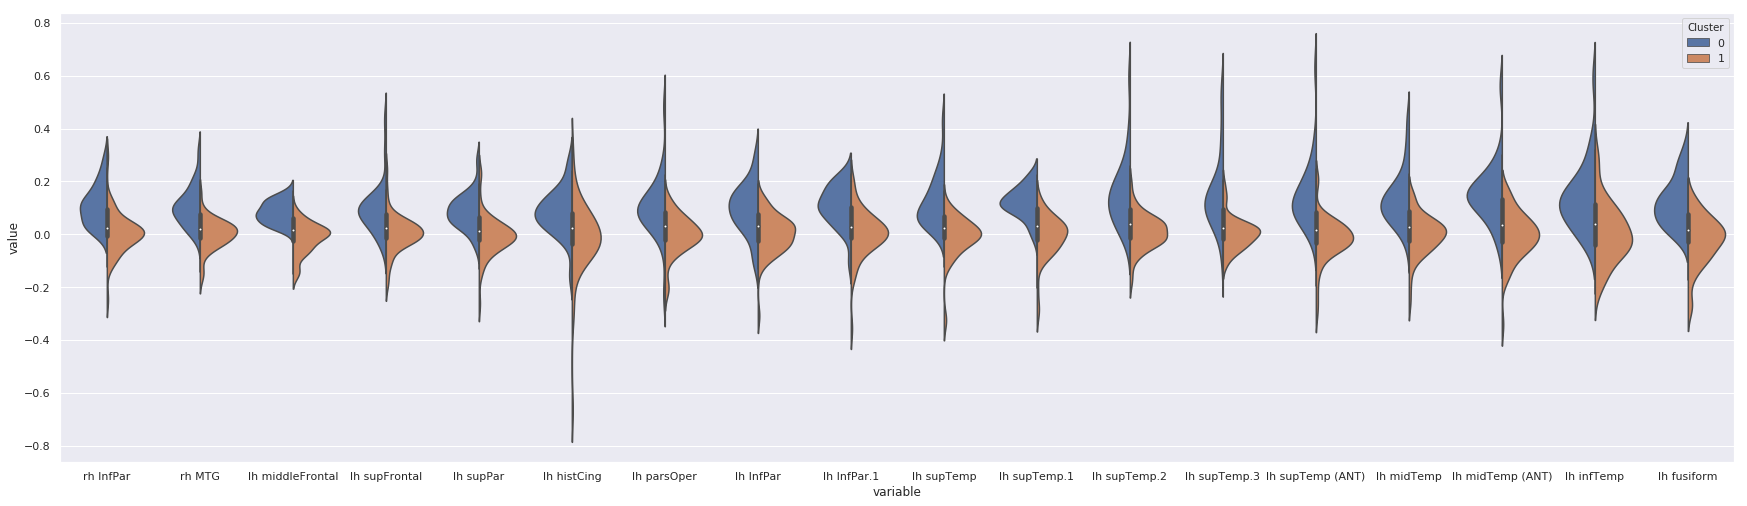

In [23]:
sns.set(rc={'figure.figsize':(30,8.27)})
changes_long_form_two = pd.melt(changes_2_clusters, id_vars="Cluster", value_vars=features)
ax_violin_two = sns.violinplot(x='variable', y='value', data=changes_long_form_two, hue="Cluster", split=True)

In [24]:
#ignore
#PCA of raw values
pca = PCA(n_components=2)
#pca.components_ 
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.096029,-0.052767
1,-0.447862,0.233673
2,-1.507685,-0.723074
3,-1.300096,-0.649408
4,-0.469746,0.744585


In [25]:
#Three clusters of changes
changes_3_clusters = changes.copy()
km_3 = KMeans(n_clusters = 3)
changes_three_clusters = km_3.fit(changes_3_clusters)
three_labels = changes_three_clusters.labels_
changes_3_clusters['Cluster'] = three_labels
changes_3_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,-0.098812,-0.036080,-0.049995,-0.079824,0.228147,-0.080182,-0.016810,-0.057971,-0.167500,-0.066036,-0.104328,0.028716,0.016738,-0.123051,0.081660,0.155587,0.024117,0.030079,0
1,0.014298,-0.013110,0.031313,0.038937,-0.013244,-0.036922,-0.012241,-0.038823,-0.005544,0.060630,0.018661,0.021142,-0.038798,0.047263,0.057534,0.060220,0.033155,0.030628,0
2,0.036438,-0.097279,0.034129,-0.007884,0.040193,-0.011251,0.142972,0.048388,0.068715,0.017417,0.073304,-0.009413,-0.051758,-0.062821,0.084486,0.022499,0.319092,-0.075363,0
3,0.007720,-0.018281,0.005880,0.002892,0.046597,0.053228,-0.007888,0.071746,-0.007106,0.026225,-0.061417,-0.013994,0.005852,-0.007808,-0.050935,0.093447,0.088168,0.068318,0
4,-0.002259,0.020091,-0.009247,0.007200,0.024874,-0.020362,0.056017,-0.022218,0.026744,-0.018695,0.076428,-0.042614,-0.032368,0.036005,-0.023416,-0.014169,-0.095897,-0.000756,0


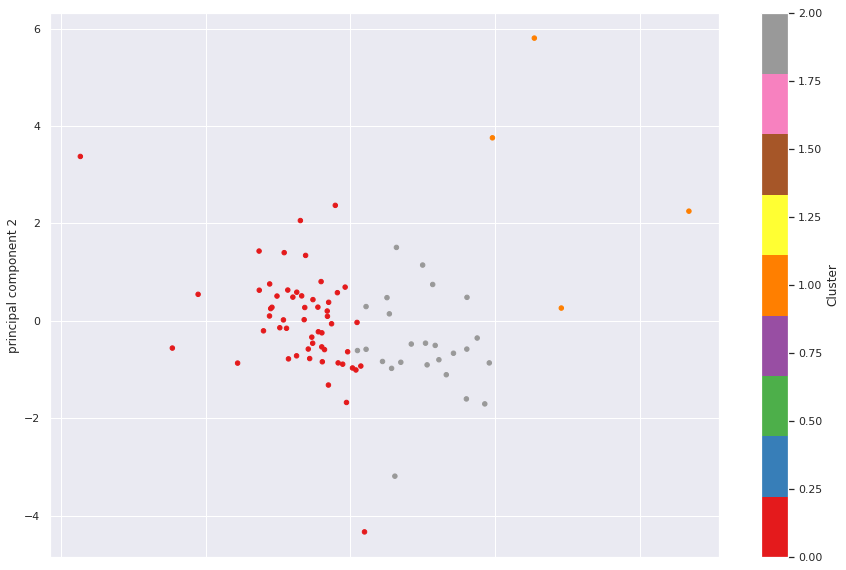

In [28]:
#PCA plot of three clusters
sns.set(rc={'figure.figsize':(15, 10)})
changes_three_cluster_pca = changes_pca.copy()
changes_three_cluster_pca["Cluster"] = changes_3_clusters["Cluster"]
changes_three_cluster_pca["Diagnosis"] = changes_with_diagnosis["Diagnosis"]
ax_3_cluster = changes_three_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_3_cluster)

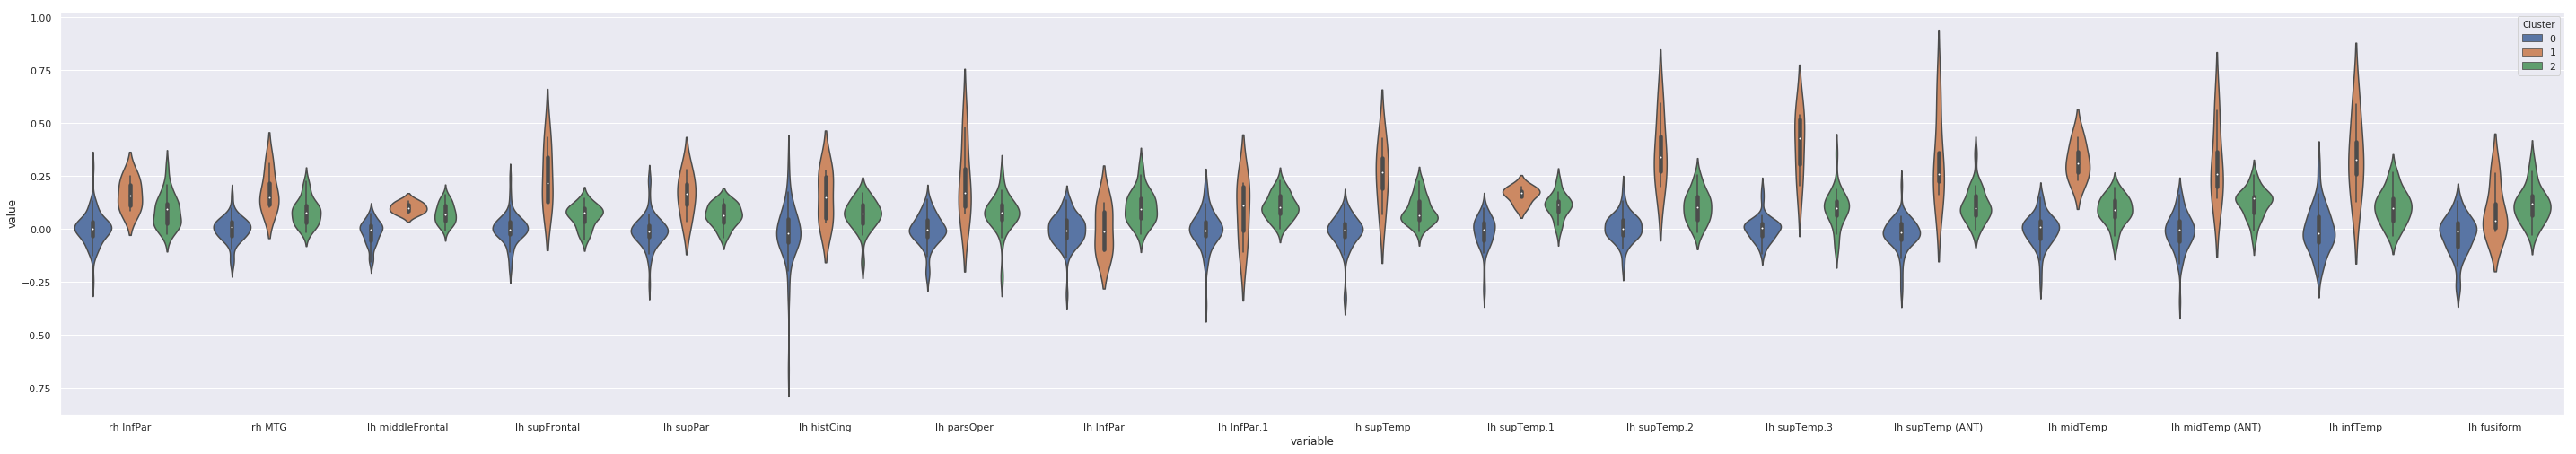

In [29]:
sns.set(rc={'figure.figsize':(50,8.27)})
changes_long_form_three = pd.melt(changes_3_clusters, id_vars="Cluster", value_vars=features)
ax_violin_three = sns.violinplot(x='variable', y='value', data=changes_long_form_three, hue="Cluster")

In [37]:
changes_three_cluster_pca["PIDN"] = interaction[::2].set_index(pd.Index(range(84)))["PIDN"]
changes_three_cluster_pca[changes_three_cluster_pca["Cluster"] == 1]

,principal component 1,principal component 2,Diagnosis,Cluster,PIDN
10,4.910339,3.756110,1,1,2720
57,6.358102,5.803364,2,1,2098
62,11.698708,2.250376,2,1,2863
79,7.290161,0.260715,2,1,19875


In [66]:
#Four clusters of changes
changes_4_clusters = changes.copy()
km_4 = KMeans(n_clusters = 4)
changes_four_clusters = km_4.fit(changes_4_clusters)
four_labels = changes_four_clusters.labels_
changes_4_clusters['Cluster'] = four_labels
changes_4_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,-0.098812,-0.036080,-0.049995,-0.079824,0.228147,-0.080182,-0.016810,-0.057971,-0.167500,-0.066036,-0.104328,0.028716,0.016738,-0.123051,0.081660,0.155587,0.024117,0.030079,0
1,0.014298,-0.013110,0.031313,0.038937,-0.013244,-0.036922,-0.012241,-0.038823,-0.005544,0.060630,0.018661,0.021142,-0.038798,0.047263,0.057534,0.060220,0.033155,0.030628,0
2,0.036438,-0.097279,0.034129,-0.007884,0.040193,-0.011251,0.142972,0.048388,0.068715,0.017417,0.073304,-0.009413,-0.051758,-0.062821,0.084486,0.022499,0.319092,-0.075363,0
3,0.007720,-0.018281,0.005880,0.002892,0.046597,0.053228,-0.007888,0.071746,-0.007106,0.026225,-0.061417,-0.013994,0.005852,-0.007808,-0.050935,0.093447,0.088168,0.068318,0
4,-0.002259,0.020091,-0.009247,0.007200,0.024874,-0.020362,0.056017,-0.022218,0.026744,-0.018695,0.076428,-0.042614,-0.032368,0.036005,-0.023416,-0.014169,-0.095897,-0.000756,0


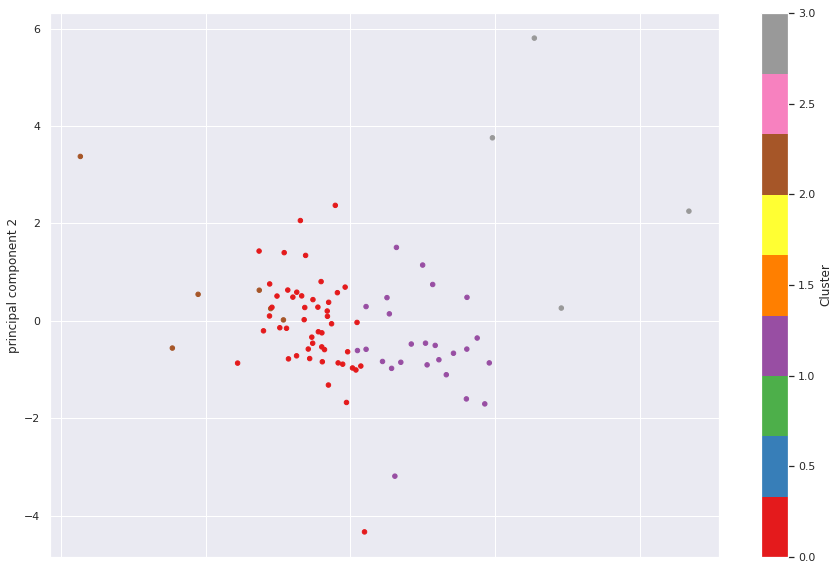

In [67]:
#PCA plot of four changes
changes_four_cluster_pca = changes_pca.copy()
changes_four_cluster_pca["Cluster"] = changes_4_clusters["Cluster"]
changes_four_cluster_pca["Diagnosis"] = changes_with_diagnosis["Diagnosis"]
ax_4_cluster = changes_four_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_4_cluster)

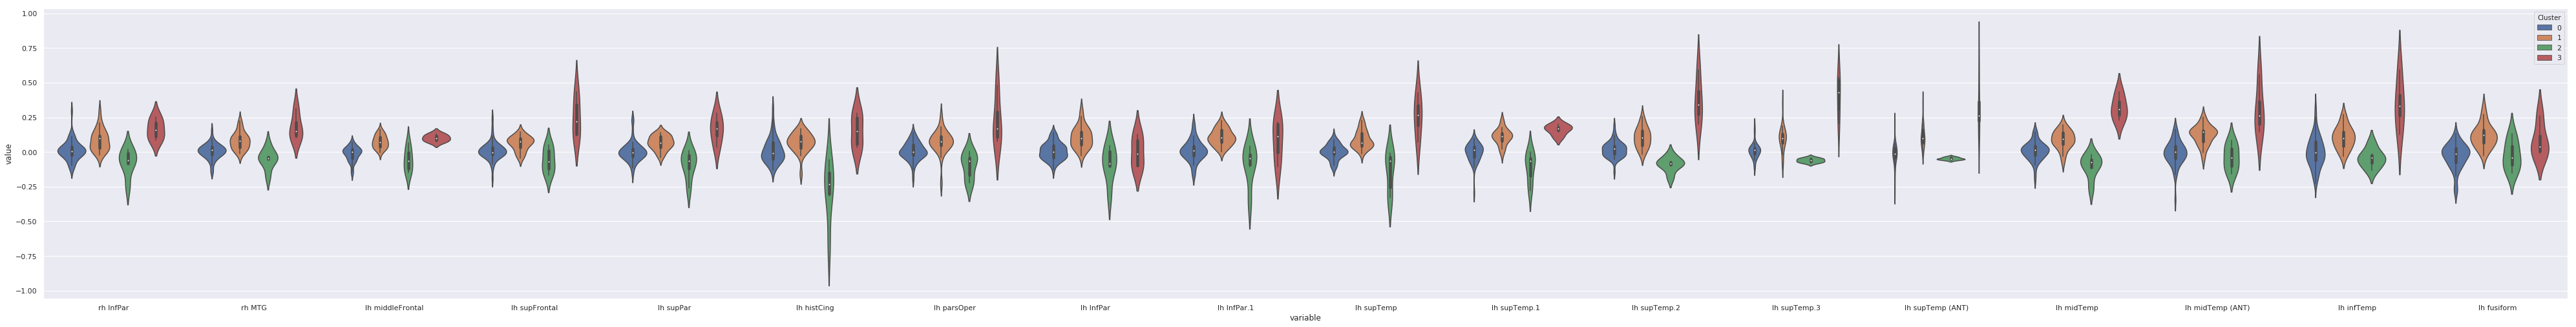

In [82]:
sns.set(rc={'figure.figsize':(70,8.27)})
changes_long_form_four = pd.melt(changes_4_clusters, id_vars="Cluster", value_vars=features)
ax_violin_four = sns.violinplot(x='variable', y='value', data=changes_long_form_four, hue="Cluster")

In [69]:
#Five clusters of changes
changes_5_clusters = changes.copy()
km_5 = KMeans(n_clusters = 5)
changes_five_clusters = km_5.fit(changes_5_clusters)
five_labels = changes_five_clusters.labels_
changes_5_clusters['Cluster'] = five_labels
changes_5_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,-0.098812,-0.036080,-0.049995,-0.079824,0.228147,-0.080182,-0.016810,-0.057971,-0.167500,-0.066036,-0.104328,0.028716,0.016738,-0.123051,0.081660,0.155587,0.024117,0.030079,3
1,0.014298,-0.013110,0.031313,0.038937,-0.013244,-0.036922,-0.012241,-0.038823,-0.005544,0.060630,0.018661,0.021142,-0.038798,0.047263,0.057534,0.060220,0.033155,0.030628,0
2,0.036438,-0.097279,0.034129,-0.007884,0.040193,-0.011251,0.142972,0.048388,0.068715,0.017417,0.073304,-0.009413,-0.051758,-0.062821,0.084486,0.022499,0.319092,-0.075363,0
3,0.007720,-0.018281,0.005880,0.002892,0.046597,0.053228,-0.007888,0.071746,-0.007106,0.026225,-0.061417,-0.013994,0.005852,-0.007808,-0.050935,0.093447,0.088168,0.068318,0
4,-0.002259,0.020091,-0.009247,0.007200,0.024874,-0.020362,0.056017,-0.022218,0.026744,-0.018695,0.076428,-0.042614,-0.032368,0.036005,-0.023416,-0.014169,-0.095897,-0.000756,3


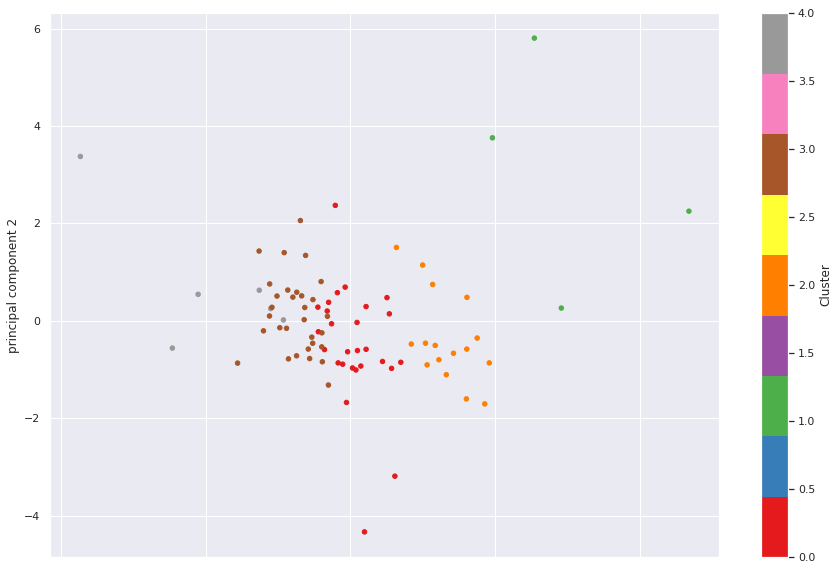

In [71]:
#PCA plot of five clusters
changes_five_cluster_pca = changes_pca.copy()
changes_five_cluster_pca["Cluster"] = changes_5_clusters["Cluster"]
changes_five_cluster_pca["Diagnosis"] = changes_with_diagnosis["Diagnosis"]
ax_5_cluster = changes_five_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_5_cluster)

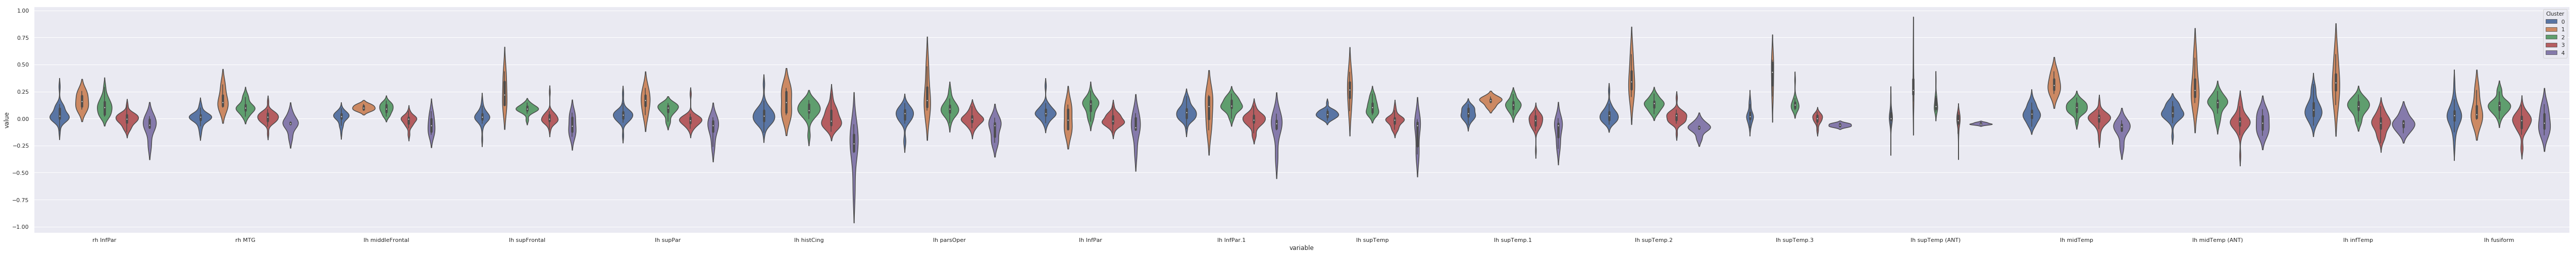

In [84]:
sns.set(rc={'figure.figsize':(90,8.27)})
changes_long_form_five = pd.melt(changes_5_clusters, id_vars="Cluster", value_vars=features)
ax_violin_five = sns.violinplot(x='variable', y='value', data=changes_long_form_five, hue="Cluster")

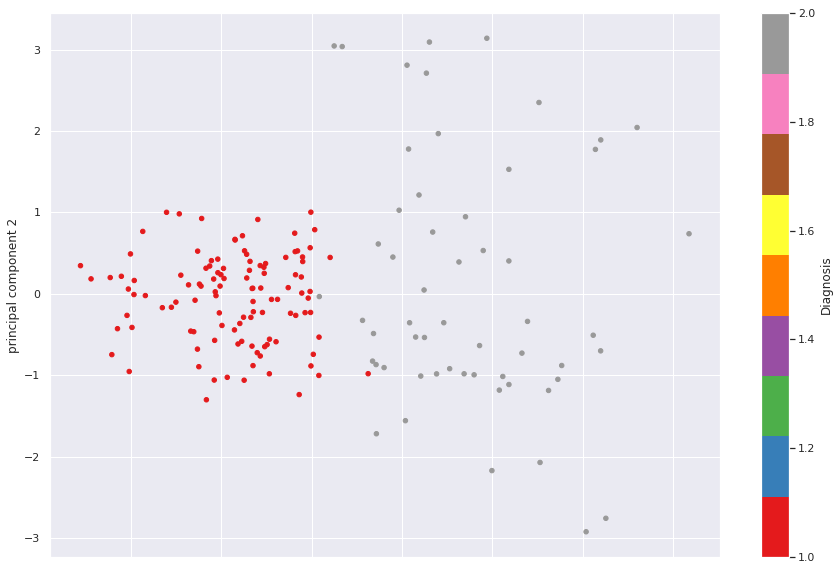

In [0]:
sns.set(rc={'figure.figsize':(15, 10)})
unclustered_pca = pca_2D_raw(interaction)
unclustered_pca["Diagnosis"] = interaction["Diagnosis"]
ax_unclustered = unclustered_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Diagnosis", colormap="Set1")

In [0]:
interaction_2_clusters = interaction_features.copy()
km_2 = KMeans(n_clusters = 2)
interaction_two_clusters = km_2.fit(interaction_2_clusters)
two_labels = interaction_two_clusters.labels_
interaction_2_clusters['Cluster'] = two_labels
interaction_2_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,1
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,1
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,1
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,1
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,1


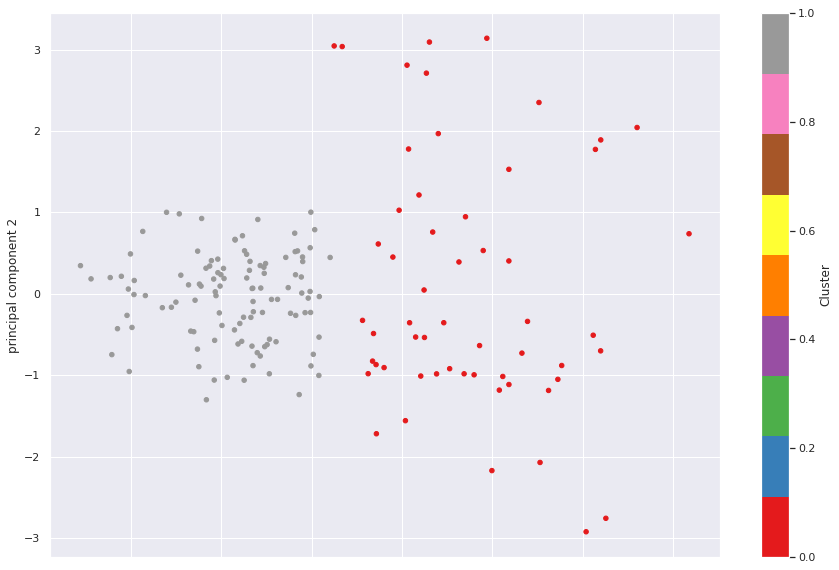

In [0]:
two_cluster_pca = principalDf.copy()
two_cluster_pca["Cluster"] = interaction_2_clusters["Cluster"]
two_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_2_cluster = two_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_2_cluster)
plt.show(ax_unclustered)

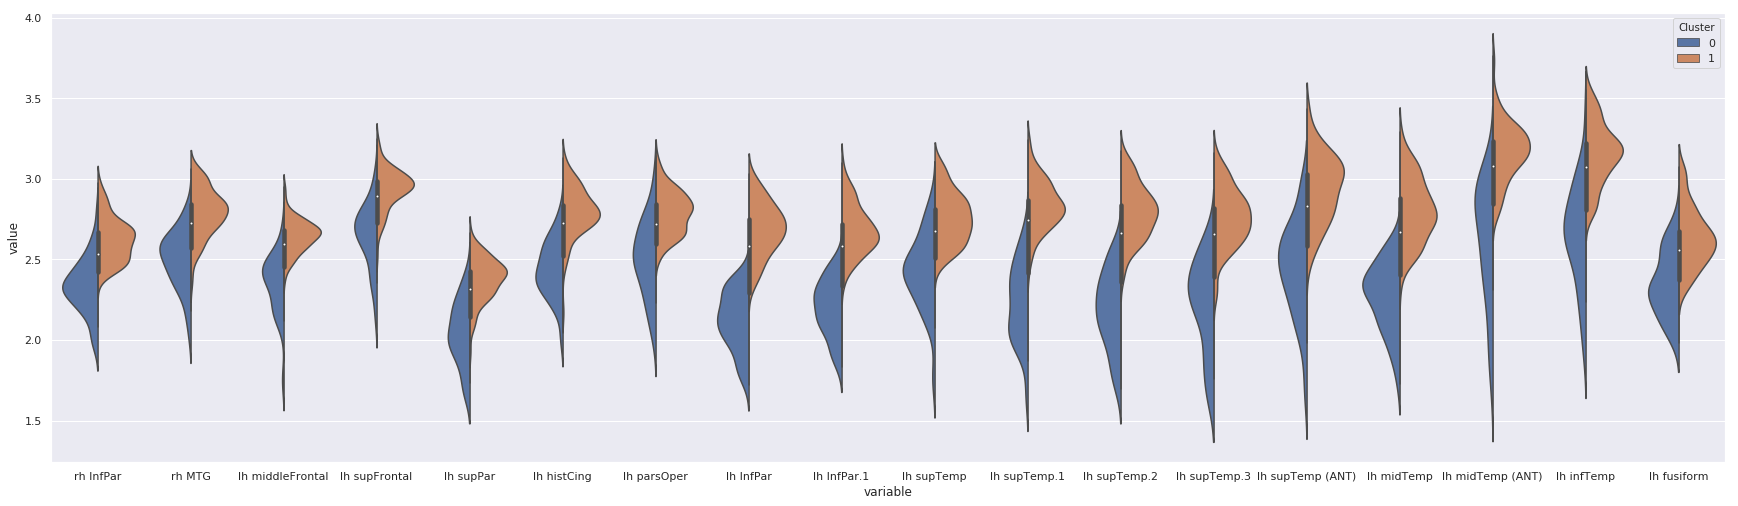

In [0]:
sns.set(rc={'figure.figsize':(30,8.27)})
long_form_two = pd.melt(interaction_2_clusters, id_vars="Cluster", value_vars=features)
ax_violin_two = sns.violinplot(x='variable', y='value', data=long_form_two, hue="Cluster", split=True)

In [0]:
interaction_3_clusters = interaction_features.copy()
km_3 = KMeans(n_clusters = 3)
interaction_three_clusters = km_3.fit(interaction_3_clusters)
three_labels = interaction_three_clusters.labels_
interaction_3_clusters['Cluster'] = three_labels
interaction_3_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,2
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,2
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,2
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,2
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,2


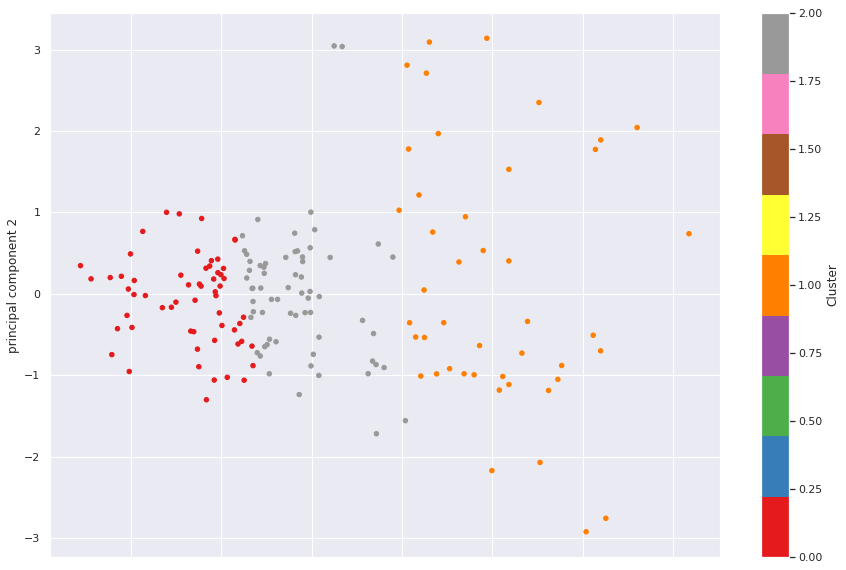

In [0]:
sns.set(rc={'figure.figsize':(15,10)})
three_cluster_pca = principalDf.copy()
three_cluster_pca["Cluster"] = interaction_3_clusters["Cluster"]
three_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_3_cluster = three_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_3_cluster)
plt.show(ax_unclustered)

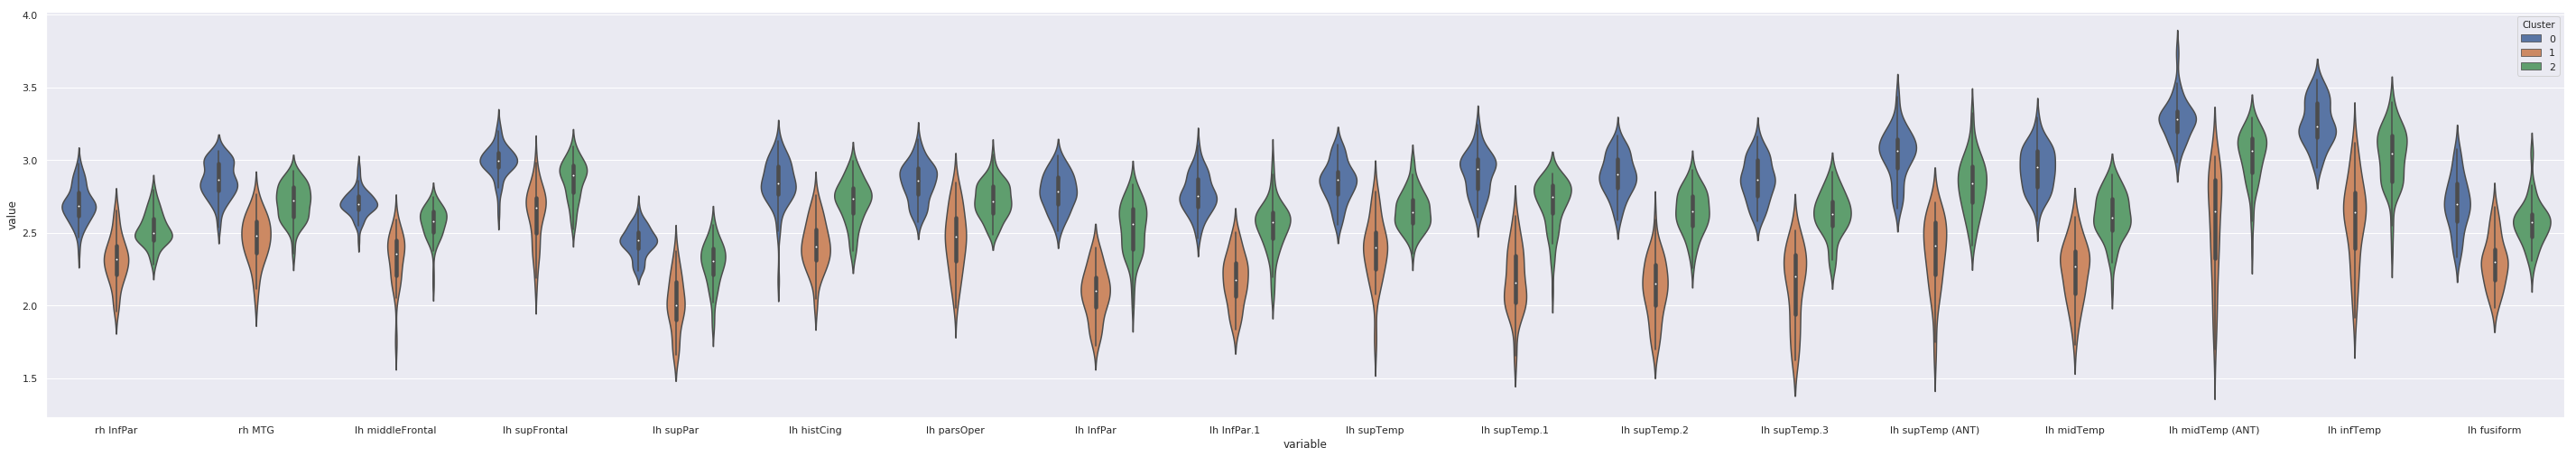

In [0]:
sns.set(rc={'figure.figsize':(50,8.27)})
long_form_three = pd.melt(interaction_3_clusters, id_vars="Cluster", value_vars=features)
ax_violin_three = sns.violinplot(x='variable', y='value', data=long_form_three, hue="Cluster")

In [0]:
interaction_4_clusters = interaction_features.copy()
km_4 = KMeans(n_clusters = 4)
interaction_four_clusters = km_4.fit(interaction_4_clusters)
four_labels = interaction_four_clusters.labels_
interaction_4_clusters['Cluster'] = four_labels
#adjusting cluster numbers
for i in interaction_3_clusters["Cluster"]:
  if i == 2:
    i = 1
interaction_4_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,2
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,2
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,2
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,2
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,2


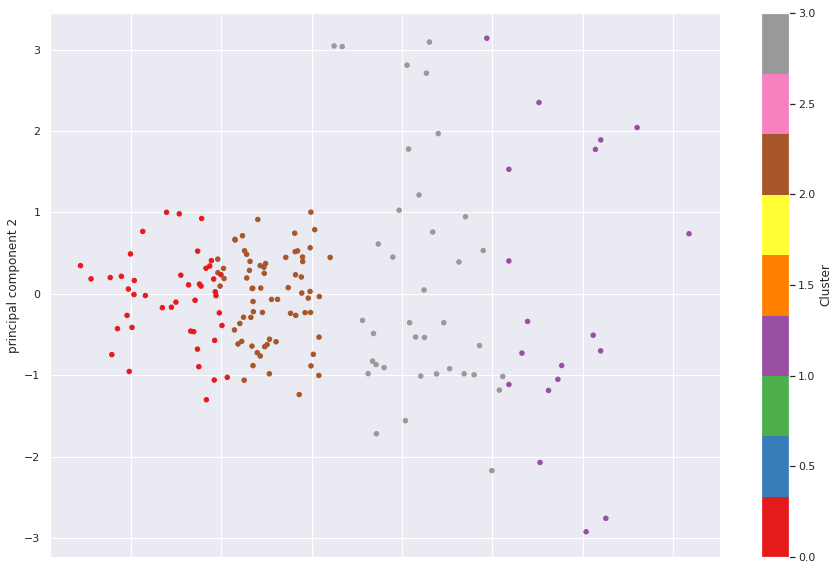

In [0]:
#PCA
sns.set(rc={'figure.figsize':(15, 10)})
four_cluster_pca = principalDf.copy()
four_cluster_pca["Cluster"] = interaction_4_clusters["Cluster"]
four_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_4_cluster = four_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_4_cluster)
plt.show(ax_unclustered)

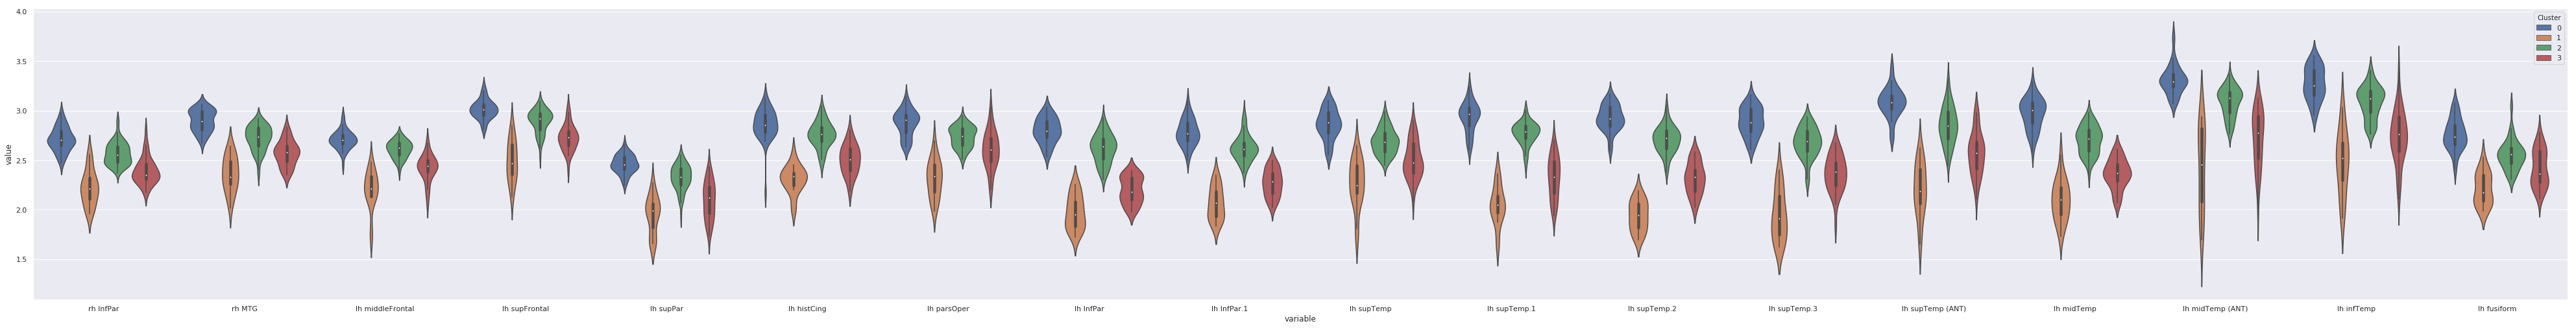

In [0]:
sns.set(rc={'figure.figsize':(70,8.27)})
long_form_four = pd.melt(interaction_4_clusters, id_vars="Cluster", value_vars=features)
ax_violin_four = sns.violinplot(x='variable', y='value', data=long_form_four, hue="Cluster")

In [0]:
interaction_5_clusters = interaction_features.copy()
km_5 = KMeans(n_clusters = 5)
interaction_five_clusters = km_5.fit(interaction_5_clusters)
five_labels = interaction_five_clusters.labels_
interaction_5_clusters['Cluster'] = five_labels
#adjusting cluster numbers
interaction_5_clusters["Cluster"]
interaction_5_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,1
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,1
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,1
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,1
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,1


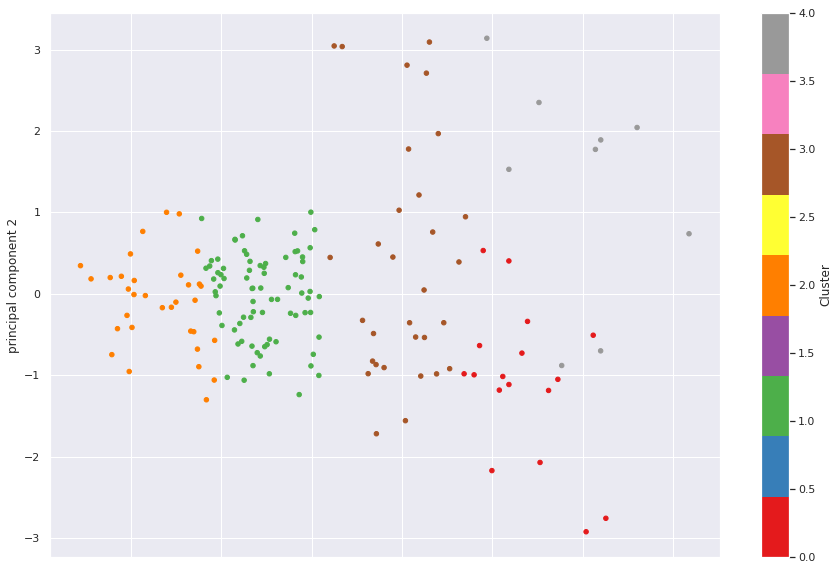

In [0]:
#PCA
sns.set(rc={'figure.figsize':(15, 10)})
five_cluster_pca = principalDf.copy()
five_cluster_pca["Cluster"] = interaction_5_clusters["Cluster"]
five_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_5_cluster = five_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_5_cluster)
plt.show(ax_unclustered)

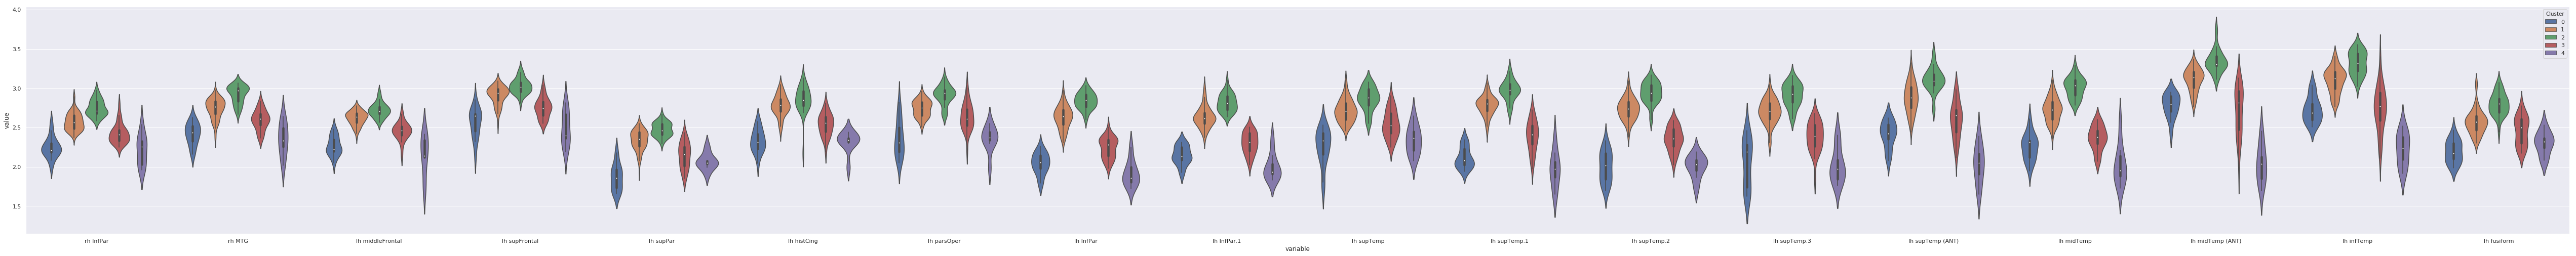

In [0]:
sns.set(rc={'figure.figsize':(90,8.27)})
long_form_five = pd.melt(interaction_5_clusters, id_vars="Cluster", value_vars=features)
ax_violin_five = sns.violinplot(x='variable', y='value', data=long_form_five, hue="Cluster")

In [0]:
display(ax_violin,
ax_violin_two,
ax_violin_three,
ax_violin_four,
ax_violin_five)

In [0]:
import os
os.getcwd()
os.listdir(os.getcwd())

['.config', 'sample_data']

In [0]:
#load data: DMN_ROIs is shown
data = pd.read_csv('thick_long_lvPPA_DMN_ROIs.csv')

FileNotFoundError: ignored

In [0]:
data.head()

NameError: ignored